# SOM 

Cargamos el modelo de som ya entrenado en [som_ontologias](./som_ontologias.ipynb)

In [29]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
%matplotlib inline
import numpy as np
import csv


import pandas as pd


### Dataframe 

Recuperamos los datos

In [2]:
df_ext = pd.read_csv('fams_ontologia_KH.csv', index_col=0)
df_ext.head()

,familia,hydrolase,electron transfer activity,protein dimerization activity,isomerase,motor activity,transferase,transmembrane transporter,translation initiation factor activity,binding,...,oxidoreductase,ligase,structural molecule activity,catalytic activity,lyase,copper chaperone activity,a,b,H,K
0,PF00005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.854726,0.399581,4.657690,0.568075
1,PF00006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.773303,0.465925,4.569146,0.404377
2,PF00009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.725873,0.473624,4.744185,0.500737
3,PF00013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.488458,0.450859,4.864910,0.395101
4,PF00023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.985735,0.398635,4.477511,0.154919


In [3]:
#R original
#R = ['familia', 'a', 'b','hydrolase','isomerase', 'transferase', 'transmembrane transporter', 'translation initiation factor activity','binding', 'ligase', 'structural constituent', 'oxidoreductase', 'catalytic activity', 'lyase', 'H', 'K']

#R = ['familia', 'a', 'b', 'H', 'K' ]
#R = ['familia', 'binding', 'transferase', 'hydrolase']
R = ['familia', 'a', 'b', 'H', 'K', 'binding', 'transferase', 'hydrolase']

df = df_ext[R]
k = len(R)-1
#datos = scale(df_ext[R[1:]].values)
datos = MinMaxScaler().fit_transform(df_ext[R[1:]].values)
print(datos)
ln = int(np.sqrt(len(datos)))
print(ln)

[[0.37840447 0.28501824 0.64521865 ... 0.         0.         1.        ]
 [0.3358309  0.32662037 0.57972569 ... 1.         0.         0.        ]
 [0.31103123 0.33144816 0.70919583 ... 1.         0.         1.        ]
 ...
 [0.09606724 0.29032135 0.87887022 ... 1.         0.         0.        ]
 [0.34233853 0.3929628  0.60078891 ... 1.         0.         0.        ]
 [0.60877426 0.55411588 0.35840867 ... 1.         0.         0.        ]]
14


In [4]:
def genera_v_random(dim1=4,dim2=3):
    v = np.random.rand(dim1,)
    w = [np.random.randint(0,2) for _ in range(dim2)]
    return np.concatenate((v,np.array(w)))

def prots_aleatorias(N, dim1, dim2):
    V = []
    for i in range(N):
        V.append(genera_v_random(dim1,dim2))
    return np.array(V)

V = prots_aleatorias(50,4,3)
N = ['frand_{}'.format(i) for i in range(len(V))]
print(N)
print(V)

['frand_0', 'frand_1', 'frand_2', 'frand_3', 'frand_4', 'frand_5', 'frand_6', 'frand_7', 'frand_8', 'frand_9', 'frand_10', 'frand_11', 'frand_12', 'frand_13', 'frand_14', 'frand_15', 'frand_16', 'frand_17', 'frand_18', 'frand_19', 'frand_20', 'frand_21', 'frand_22', 'frand_23', 'frand_24', 'frand_25', 'frand_26', 'frand_27', 'frand_28', 'frand_29', 'frand_30', 'frand_31', 'frand_32', 'frand_33', 'frand_34', 'frand_35', 'frand_36', 'frand_37', 'frand_38', 'frand_39', 'frand_40', 'frand_41', 'frand_42', 'frand_43', 'frand_44', 'frand_45', 'frand_46', 'frand_47', 'frand_48', 'frand_49']
[[0.13795857 0.17844736 0.35065039 0.22075787 1.         0.
  1.        ]
 [0.44005034 0.24766136 0.96110716 0.64552341 1.         0.
  1.        ]
 [0.53064198 0.791143   0.94165369 0.82388934 0.         1.
  0.        ]
 [0.61197    0.10907516 0.09751548 0.75494401 1.         0.
  0.        ]
 [0.85326518 0.47683408 0.53227022 0.54144815 0.         1.
  1.        ]
 [0.88843849 0.69510867 0.96083874 0.63

In [5]:
k

7

In [6]:
semilla = sum(map(ord, 'rids'))
print(semilla)
np.random.seed(semilla)

434


### Modelo entrenado

In [7]:
from sklearn.neural_network  import MLPClassifier
from sklearn.neural_network  import BernoulliRBM
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import MinMaxScaler, StandardScaler, scale


from minisom import MiniSom
#from sompy.sompy import som

import seaborn as sns

import pickle 


In [8]:
np.random.seed(sum(list(map(ord,'proteinas'))))

In [9]:
#si deseamos recuperar algún modelo anterio


recupera=False
if(recupera):
    som = pickle.load(open('som_13x12_500_s1_ca1.pkl','rb'))
else:
    ln=14 
    dim_som = (ln,ln)
    sigmas = [0.7,1,1.5,2,3]  #sigmas a intentar
    constantes = [1,2,3]  #constantes de aprendizaje a buscar
    errores = []
    buscar=True
    if(buscar):
        for s in sigmas:
            for c in constantes:
                som = MiniSom(dim_som[0], dim_som[1], k, sigma=s, learning_rate=c, 
                              activation_distance='euclidean', topology='hexagonal', 
                              neighborhood_function='gaussian')
                som.pca_weights_init(datos)
                som.train_batch(datos,1000, verbose=False)
                q = som.quantization_error(datos)
                errores.append( (s,c, q) )
                print( "s: {}  c: {} -> q: {}".format(s,c,q))
    else:
        errores = [(1.5,3,0.0755)]
    mejor = sorted(errores, key=lambda x: x[2])[0]
    print("Sigma {}, ca {}".format(mejor[0], mejor[1]))
  

s: 0.7  c: 1 -> q: 0.13620798109933022
s: 0.7  c: 2 -> q: 0.11088206351231684
s: 0.7  c: 3 -> q: 0.10685250614697972
s: 1  c: 1 -> q: 0.10433157290845609
s: 1  c: 2 -> q: 0.08207139607180215
s: 1  c: 3 -> q: 0.05843014870817991
s: 1.5  c: 1 -> q: 0.08238434965426833
s: 1.5  c: 2 -> q: 0.05775875494382677
s: 1.5  c: 3 -> q: 0.05076191095738472
s: 2  c: 1 -> q: 0.08731005265018842
s: 2  c: 2 -> q: 0.07806494188195737
s: 2  c: 3 -> q: 0.07805499015882875
s: 3  c: 1 -> q: 0.11642431500309783
s: 3  c: 2 -> q: 0.11996205989957373
s: 3  c: 3 -> q: 0.126245931439567
Sigma 1.5, ca 3


Usamos el modelo entrenado

In [11]:
som = MiniSom(dim_som[0], dim_som[1], k, sigma=mejor[0], learning_rate=mejor[1], 
              activation_distance='euclidean', topology='hexagonal', 
              neighborhood_function='gaussian')
som.pca_weights_init(datos)
som.train_batch(datos,1000, verbose=True)

qe = som.quantization_error(datos)

print('Error de cuantización {0:0.5f}'.format(q))

 [ 1000 / 1000 ] 100% - 0:00:00 left 


 quantization error: 0.05076191095738472
Error de cuantización 0.12625


In [12]:
nombres = df_ext['familia'].values
qnt = som.quantization(datos)
print(len(qnt))
print(len(R[1:])==k)

206
True


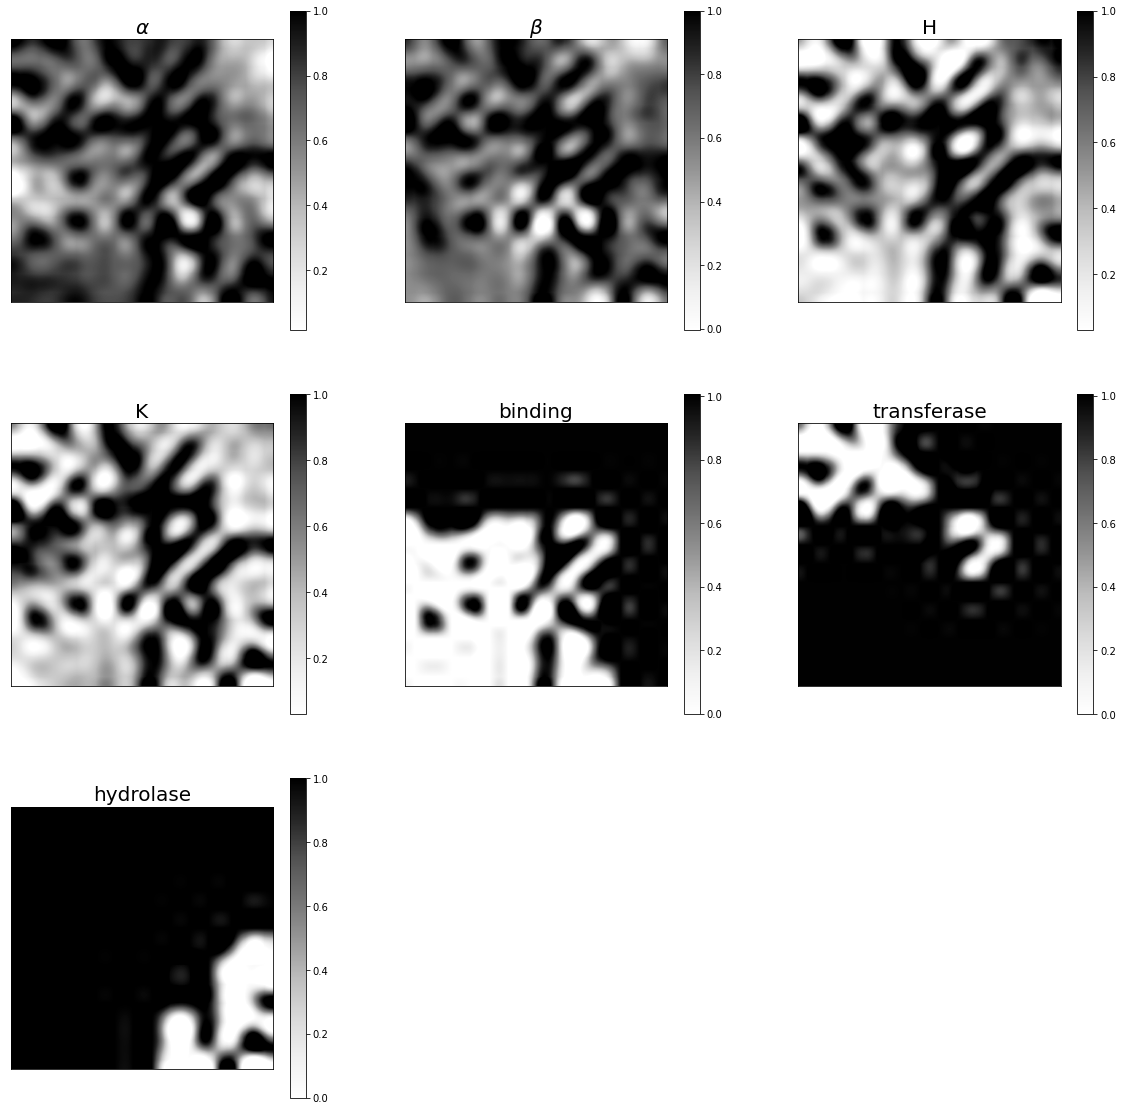

In [13]:
color='Greys'
inter='sinc'
rs, cs = 3,3
fig, axn = plt.subplots(rs,cs, figsize=(20,20))

titulos = ['', r'$\alpha$', r'$\beta$', 'H', 'K', 'binding', 'transferase', 'hydrolase' ]
for j,ax in enumerate(axn.flat):
    if(j<k):
        D = np.zeros(dim_som)
        for ix,d in enumerate(datos):
            w = som.winner(d)
            D[w] = qnt[ix][j]
        plt.subplot(rs,cs,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.title(titulos[j+1], fontsize=20)
        plt.imshow(1-D,interpolation=inter,cmap=color)
        plt.colorbar()
        ax.axis('off')
    else:
        ax.axis('off')
    

## Grupos de familias

In [14]:
# from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

In [15]:
n_clusters=6
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', affinity='euclidean')
cl = cluster.fit_predict(qnt)

In [16]:
clases = dict()
for f, c in zip(nombres, cl):
    clases[c] = clases.get(c,[]) + [f]

In [17]:
fam_grupo = lambda n: list(nombres[cl==n])
def escribe_gpo(i):
    fout = open('grupo_modelo_{}.dat'.format(i),'w')
    gpo = '\n'.join(fam_grupo(i))
    fout.write(gpo)
    fout.close()

for i in range(4):
    escribe_gpo(i)

Graficamos tomando como base [liga](https://github.com/JustGlowing/minisom/blob/master/examples/HexagonalTopology.ipynb)

In [18]:
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D


from bokeh.colors import RGB
from bokeh.io import curdoc, show, output_notebook
from bokeh.transform import factor_mark, factor_cmap
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, output_file


# display matplotlib plots in notebook
%matplotlib inline
# display bokeh plot in notebook
output_notebook()

Loading BokehJS ...

Vamos a usar los siguientes parámetros en la graficación

In [19]:
##Círculos azules = binding ontology
##Equis morado = Transferase ontology
##Triángulo invertido  amarillo ocre = Binding-transferase ontologies
##Pentágono rojo =  hidrolase ontology
##Más amarillo = BInding-hidrolase ontologies
##Cuadrado verde = other ontologies

seleccion = [ ('o', '#0000ff'), #circulo azul                - binding
              ('s', '#009933'), #cuadrado verde              - other
              ('p', '#e60000'), #pentagono rojo              - hidrolase
              ('X', '#800080'), #X morado                    - transferase
              ('P', '#ffff00'), #triangulo purpura           - binding hidrolase
              ('v', '#ffa500')  #triangulo invertido naranga - binding transferase
    
]

marcadores = [x[0] for x in seleccion]
colores    = [x[1] for x in seleccion]
textos     = ["Binding", "Transferase", "Binding-transferase", "Hidrolase", "Binding-hidrolase", "Other"]
text_d     = {'Binding'            : ('o', '#0000ff'), 
              'Transferase'        : ('X', '#800080'),
              'Binding-transferase': ('v', '#ffa500'),
              'Hidrolase'          : ('p', '#e60000'),
              'Other'              : ('s', '#009933'),
              'Binding-hidrolase'  : ('P', '#ffff00')}


In [20]:
xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

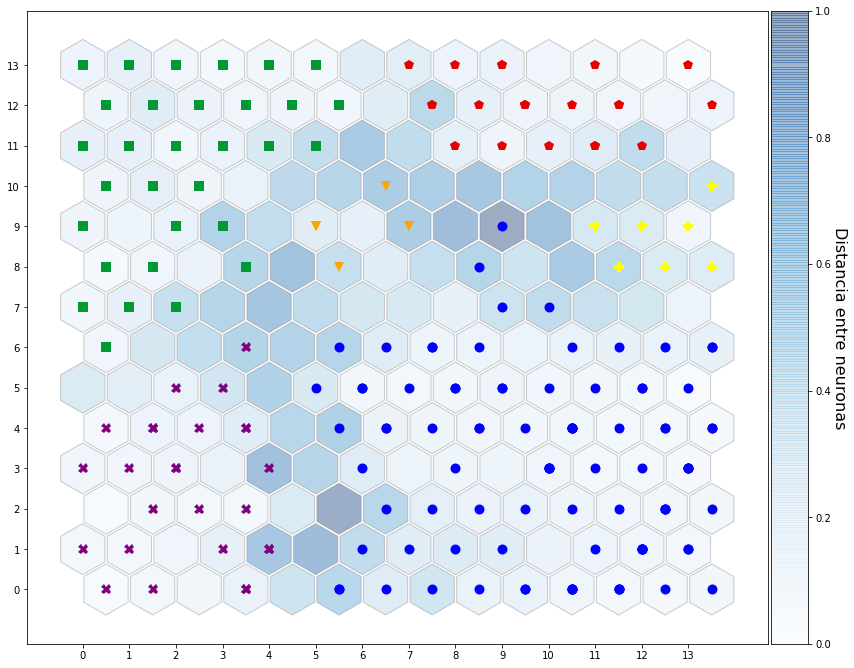

In [32]:
f = plt.figure(figsize=(14,14))
ax = f.add_subplot(111)

ax.set_aspect('equal')

# iteratively add hexagons
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * np.sqrt(3) / 2
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=cm.Blues(umatrix[i, j]), 
                             alpha=.4, 
                             edgecolor='gray')
        ax.add_patch(hex)

#plt.imshow(1- umatrix, interpolation='sinc', cmap='bone')
#plt.xticks([])
#plt.yticks([])

for ix,d in enumerate(datos):
    w = som.winner(d)
    wx, wy = som.convert_map_to_euclidean(w) 
    wy *= np.sqrt(3) / 2
    plt.plot(wx, wy, 
             marcadores[cl[ix]],
             markerfacecolor=colores[cl[ix]],
             markeredgewidth=0.0,
             markersize=10)
xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange * np.sqrt(3) / 2, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)

cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, orientation='vertical', alpha=0.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('Distancia entre neuronas', rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)